# This notebook merges the data from the "symptoms_clean.csv" and "covidstate_clean.csv" to examine and explore the combined relationships between COVID cases and deaths and symptom searches that include COVID symptom searches as well as mental health symptom search during the COVID-19 era ranging from January 2020-October 2020

### load in relevant packages and csv files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import warnings
warnings.filterwarnings('ignore')

In [2]:
symptoms_df = pd.read_csv('../data/clean/symptoms_clean.csv')

In [3]:
covid_df = pd.read_csv('../data/clean/covidstate_clean.csv')

In [4]:
covid_df

,date,state,cases,deaths
0,2020-01-21,Washington,1,0
1,2020-01-22,Washington,1,0
2,2020-01-23,Washington,1,0
3,2020-01-24,Illinois,1,0
4,2020-01-24,Washington,1,0
...,...,...,...,...
11644,2020-10-15,Virginia,162941,3388
11645,2020-10-15,Washington,100838,2331
11646,2020-10-15,West Virginia,19082,393
11647,2020-10-15,Wisconsin,171480,1568


In [5]:
covid_df['date']= pd.to_datetime(covid_df['date'])
covid_df

,date,state,cases,deaths
0,2020-01-21,Washington,1,0
1,2020-01-22,Washington,1,0
2,2020-01-23,Washington,1,0
3,2020-01-24,Illinois,1,0
4,2020-01-24,Washington,1,0
...,...,...,...,...
11644,2020-10-15,Virginia,162941,3388
11645,2020-10-15,Washington,100838,2331
11646,2020-10-15,West Virginia,19082,393
11647,2020-10-15,Wisconsin,171480,1568


In [6]:
symptoms_df['date']= pd.to_datetime(symptoms_df['date'])
symptoms_df

,state,date,anxiety,cough,depression,fever,generalized_anxiety_disorder,nausea,State,State Code,Region,Division
0,US-AK,2020-01-01,8.13,9.64,5.58,5.95,1.06,2.75,Alaska,AK,West,Pacific
1,US-AK,2020-01-02,9.21,10.41,6.74,6.33,1.58,3.40,Alaska,AK,West,Pacific
2,US-AK,2020-01-03,8.31,9.58,5.21,5.66,1.11,2.84,Alaska,AK,West,Pacific
3,US-AK,2020-01-04,7.87,9.53,5.32,4.91,1.07,2.55,Alaska,AK,West,Pacific
4,US-AK,2020-01-05,7.75,9.58,5.50,4.90,0.89,2.96,Alaska,AK,West,Pacific
...,...,...,...,...,...,...,...,...,...,...,...,...
14645,US-WY,2020-10-15,7.35,3.60,4.32,3.52,1.09,1.73,Wyoming,WY,West,Mountain
14646,US-WY,2020-10-16,6.10,3.85,3.99,3.92,0.74,1.52,Wyoming,WY,West,Mountain
14647,US-WY,2020-10-17,6.04,3.74,3.89,3.27,1.06,1.57,Wyoming,WY,West,Mountain
14648,US-WY,2020-10-18,6.15,3.85,4.11,3.31,0.94,1.70,Wyoming,WY,West,Mountain


In [7]:
full_merged = covid_df.merge(symptoms_df, right_on=['date','State'], left_on=['date', 'state'])

In [8]:
full_merged

,date,state_x,cases,deaths,state_y,anxiety,cough,depression,fever,generalized_anxiety_disorder,nausea,State,State Code,Region,Division
0,2020-01-21,Washington,1,0,US-WA,9.72,8.85,6.25,5.33,1.37,2.40,Washington,WA,West,Pacific
1,2020-01-22,Washington,1,0,US-WA,9.73,8.40,6.24,5.18,1.37,2.39,Washington,WA,West,Pacific
2,2020-01-23,Washington,1,0,US-WA,9.46,8.18,6.17,5.06,1.32,2.39,Washington,WA,West,Pacific
3,2020-01-24,Illinois,1,0,US-IL,7.22,8.23,4.45,4.66,1.04,1.97,Illinois,IL,Midwest,East North Central
4,2020-01-24,Washington,1,0,US-WA,8.52,7.95,5.57,4.83,1.14,2.23,Washington,WA,West,Pacific
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,2020-10-15,Virginia,162941,3388,US-VA,8.51,3.61,4.93,3.44,1.27,1.73,Virginia,VA,South,South Atlantic
11426,2020-10-15,Washington,100838,2331,US-WA,9.18,3.60,5.65,3.94,1.20,2.01,Washington,WA,West,Pacific
11427,2020-10-15,West Virginia,19082,393,US-WV,8.21,4.34,5.31,3.80,1.53,2.21,West Virginia,WV,South,South Atlantic
11428,2020-10-15,Wisconsin,171480,1568,US-WI,7.27,3.69,4.23,3.66,1.05,1.53,Wisconsin,WI,Midwest,East North Central


In [9]:
full_merged_sorted=full_merged.reset_index().sort_values(['state_x','date'])

In [10]:
# 1. calculate the difference (new cases/deaths)
full_merged_sorted[['new_cases','new_deaths']]=full_merged_sorted.groupby('state_x')[['cases','deaths']].diff()

In [11]:
full_merged_sorted[['new_cases','new_deaths']]=full_merged_sorted.groupby('state_x')[['cases','deaths']].diff()

In [12]:
full_merged

,date,state_x,cases,deaths,state_y,anxiety,cough,depression,fever,generalized_anxiety_disorder,nausea,State,State Code,Region,Division
0,2020-01-21,Washington,1,0,US-WA,9.72,8.85,6.25,5.33,1.37,2.40,Washington,WA,West,Pacific
1,2020-01-22,Washington,1,0,US-WA,9.73,8.40,6.24,5.18,1.37,2.39,Washington,WA,West,Pacific
2,2020-01-23,Washington,1,0,US-WA,9.46,8.18,6.17,5.06,1.32,2.39,Washington,WA,West,Pacific
3,2020-01-24,Illinois,1,0,US-IL,7.22,8.23,4.45,4.66,1.04,1.97,Illinois,IL,Midwest,East North Central
4,2020-01-24,Washington,1,0,US-WA,8.52,7.95,5.57,4.83,1.14,2.23,Washington,WA,West,Pacific
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,2020-10-15,Virginia,162941,3388,US-VA,8.51,3.61,4.93,3.44,1.27,1.73,Virginia,VA,South,South Atlantic
11426,2020-10-15,Washington,100838,2331,US-WA,9.18,3.60,5.65,3.94,1.20,2.01,Washington,WA,West,Pacific
11427,2020-10-15,West Virginia,19082,393,US-WV,8.21,4.34,5.31,3.80,1.53,2.21,West Virginia,WV,South,South Atlantic
11428,2020-10-15,Wisconsin,171480,1568,US-WI,7.27,3.69,4.23,3.66,1.05,1.53,Wisconsin,WI,Midwest,East North Central


### Save cleaned data as a new csv

In [13]:
full_merged.to_csv('../data/clean/full_merged.csv', index=False)

### Now that we have new_cases and new_deaths, we can examine the times when case/death count increased and how that might have a correlation/relationship to COVID 19 symptom searches and other mental health symptom searches


#### 1. new_cases exploration
* Explore new_cases for all states
* Explore correlations for symptoms for top5_states and bottom5_states with regards to 'new_cases' by plotting on heat maps
    * 1a. 'cough' 
    * 1b. 'fever' 
    * 1c. 'anxiety' 
    * 1d. 'depression' 
* Observe time periods when top 5 and bottom 5 states had the highest mean search correlation for each symptom mentioned above
* Also look at how all states rank in search for symptoms over time

#### 2. new_deaths exploration
* Explore new_deaths for all states
* Explore correlations for symptoms for top5_states and bottom5_states with regards to 'new_cases' by plotting on heat maps
    * 2a. 'cough' 
    * 2b. 'fever' 
    * 2c. 'anxiety' 
    * 2d. 'depression' 
* Observe time periods when top 5 and bottom 5 states had the highest mean search correlation for each symptom mentioned above
* Also look at how all states rank in search for symptoms over time


*** the top5_states and bottom5_states were from the analysis of COVID 19 cases and deaths done in 'initial_data_exploration_COVID.ipynb'

### new_cases exploration

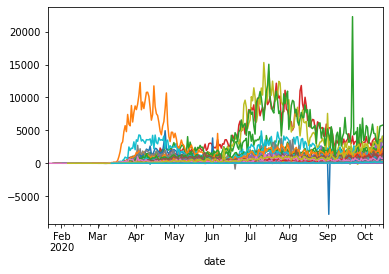

In [14]:
#Plot the new_cases per state
full_merged=full_merged_sorted.set_index(full_merged_sorted['date'])
full_merged.groupby('state_x')['new_cases'].plot();

### Observations:
* High case increase in April and July-August 
* Random case spikes in September/October

* Look at different states individually for new cases over time

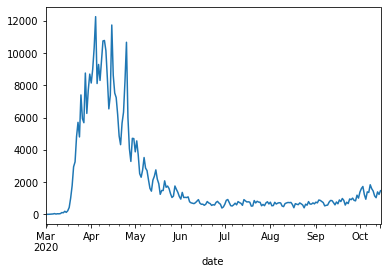

In [15]:
ny_filter = full_merged['state_x'] == 'New York'
full_merged[ny_filter]['new_cases'].plot();

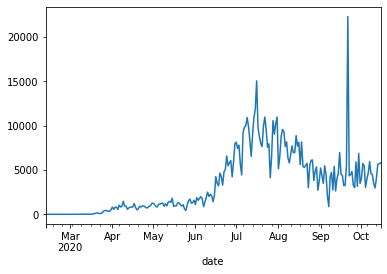

In [16]:
tx_filter = full_merged['state_x'] == 'Texas'
full_merged[tx_filter]['new_cases'].plot();

### Next step is to create a correlation by month table by selecting the two columns

### 1a. Look at 'cough' and 'new_cases'

In [17]:
# 2 group by state and month 
grouped_data=full_merged.groupby(['state_x',full_merged.index.month])[['new_cases', 'cough']]

# 3 calculate correlation between cases and symptom
ctable = grouped_data.corr()['cough'].unstack()['new_cases'].unstack()

# drop Jan and Feb (odd there is data just for a few states in these months)
ctable = ctable.drop(columns=[1,2])

# rename columns with month names intead of numbers
ctable.columns = [calendar.month_name[c] for c in ctable.columns]

# 4 create heatmap
ctable.head()

,March,April,May,June,July,August,September,October
state_x,,,,,,,,
Alabama,-0.774142,-0.090492,-0.141173,0.447816,-0.056908,0.328910,-0.280340,-0.385406
Alaska,-0.768965,0.546471,-0.164468,0.452291,-0.014969,-0.248371,0.188001,-0.158155
Arizona,-0.509302,-0.353042,-0.413045,0.673697,0.598260,0.342063,-0.016470,-0.153356
California,-0.510016,-0.286130,-0.663179,0.852054,-0.017322,0.400086,-0.280631,0.224697
Colorado,-0.736368,-0.335805,0.155877,0.527040,0.145468,0.143185,0.579066,0.077062


* The data ranges from March to Early October 2020
* Then you can select a list of states to turn into a heatmap plot

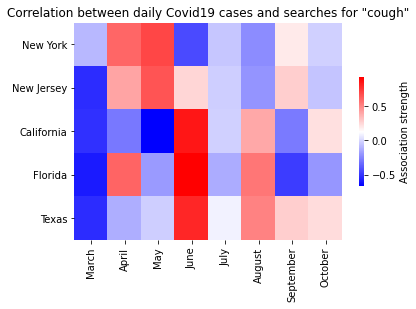

In [18]:
# Plot the top5_states for 'new_cases'

states_to_use = ['Maine','New York', 'New Jersey', 'Florida', 'California','Texas']

top5_cases = ['New York', 'New Jersey', 'California', 'Florida', 'Texas']
bottom5_cases = ['Maine', 'Vermont', 'Hawaii', 'Wyoming', 'Alaska']

#plt.figure(figsize=(8,6))
sns.heatmap(ctable.loc[top5_cases], cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 cases and searches for "cough"');

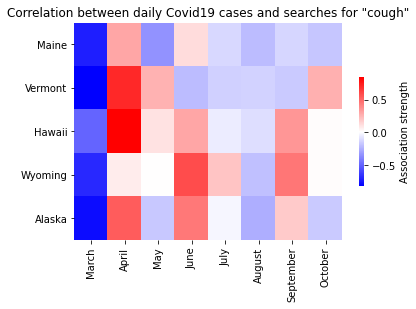

In [19]:
# Plot the bottom5_states for 'new_cases'

states_to_use = ['Maine','New York', 'New Jersey', 'Florida', 'California','Texas']

top5_cases = ['New York', 'New Jersey', 'California', 'Florida', 'Texas']
bottom5_cases = ['Maine', 'Vermont', 'Hawaii', 'Wyoming', 'Alaska']

#plt.figure(figsize=(8,6))
sns.heatmap(ctable.loc[bottom5_cases], cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 cases and searches for "cough"');

* It appears as though the states with the top number of cases searched for 'cough' more frequently during the year than the states that did not have as high of COVID 19 case numbers

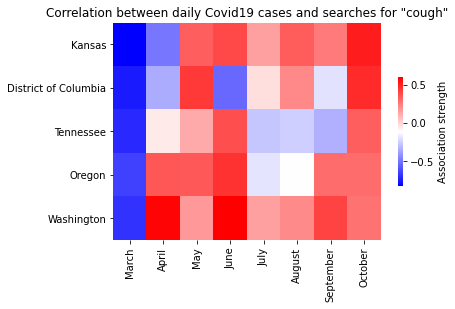

In [20]:
#Take a look at specific months and find the top states that did search for 'cough'
top5_oct = ctable.sort_values('October', ascending=False).head(5)

sns.heatmap(top5_oct, cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 cases and searches for "cough"');

### Observations
* October was riddled with searches for 'cough' 
* You could plot all the data but it would only be for exploration as it is probably too overwhelming to communicate to your readers.

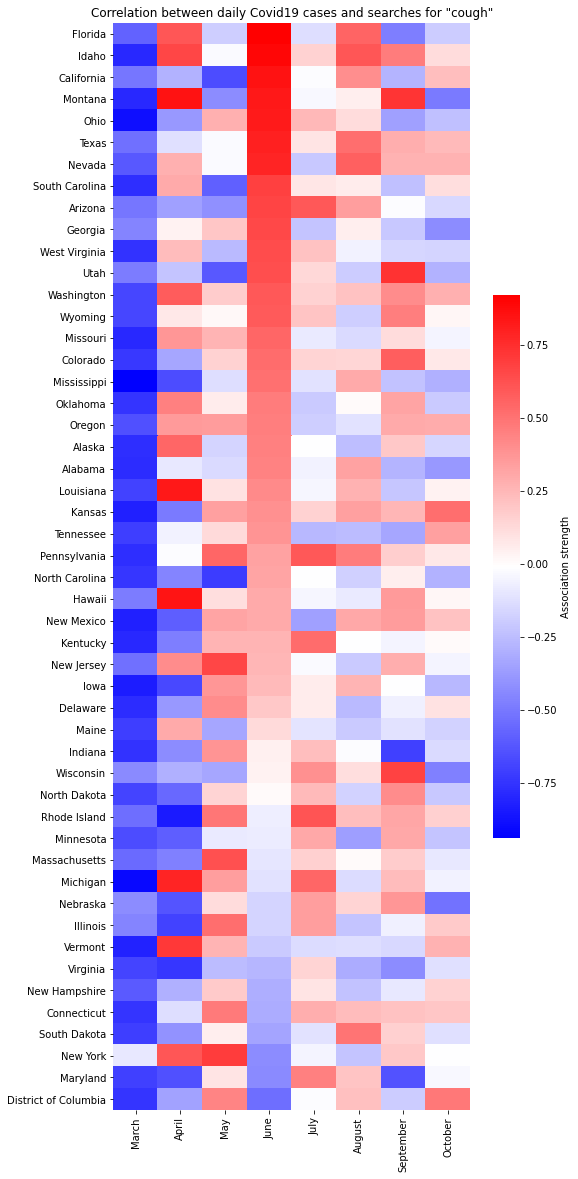

In [21]:
# set the ratio of the plot and plot all of the states, focusing on the month of June
plt.figure(figsize=(8,20))
sns.heatmap(ctable.sort_values('June', ascending=False), cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 cases and searches for "cough"');

### Observations:
* June had a high correlations between multiple states and the search for 'cough'

## 1b. Look at symptom 'fever' and 'new_cases'

In [22]:
# 1 use the 'full_merged'

# 2 group by state and month 
grouped_data=full_merged.groupby(['state_x',full_merged.index.month])[['new_cases', 'fever']]

# 3 calculate correlation between cases and symptom
ctable = grouped_data.corr()['fever'].unstack()['new_cases'].unstack()

# drop Jan and Feb (odd there is data just for a few states in these months)
ctable = ctable.drop(columns=[1,2])

# rename columns with month names intead of numbers
ctable.columns = [calendar.month_name[c] for c in ctable.columns]

# 4 create heatmap
ctable.head()

,March,April,May,June,July,August,September,October
state_x,,,,,,,,
Alabama,-0.640045,-0.086472,-0.271488,0.473388,-0.028868,0.056548,-0.145034,-0.572533
Alaska,-0.467672,0.450154,-0.333369,0.240125,-0.225063,-0.197989,-0.088333,-0.452120
Arizona,0.054289,-0.338632,-0.143055,0.698581,0.449806,0.529262,0.120342,-0.246500
California,0.014050,-0.177208,-0.288734,0.903204,-0.140833,0.590949,0.057076,-0.005993
Colorado,-0.276771,-0.324638,0.191071,0.256532,0.126629,0.312424,0.348407,-0.304272


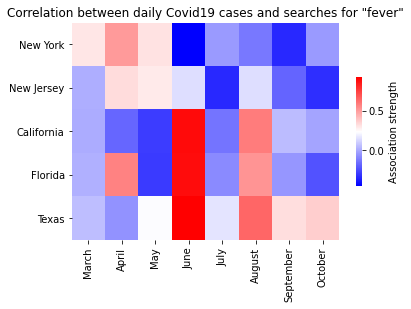

In [23]:
# Plot the top5_states for 'new_cases'

states_to_use = ['Maine','New York', 'New Jersey', 'Florida', 'California','Texas']

top5_cases = ['New York', 'New Jersey', 'California', 'Florida', 'Texas']
bottom5_cases = ['Maine', 'Vermont', 'Hawaii', 'Wyoming', 'Alaska']

#plt.figure(figsize=(8,6))
sns.heatmap(ctable.loc[top5_cases], cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 cases and searches for "fever"');

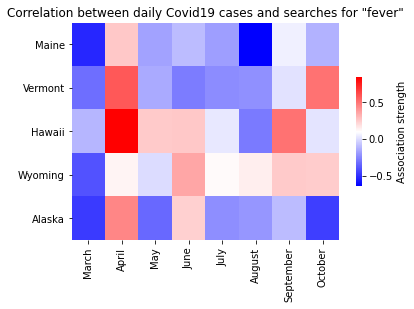

In [24]:
# Plot the bottom5_states for 'new_cases'

states_to_use = ['Maine','New York', 'New Jersey', 'Florida', 'California','Texas']

top5_cases = ['New York', 'New Jersey', 'California', 'Florida', 'Texas']
bottom5_cases = ['Maine', 'Vermont', 'Hawaii', 'Wyoming', 'Alaska']

#plt.figure(figsize=(8,6))
sns.heatmap(ctable.loc[bottom5_cases], cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 cases and searches for "fever"');

* Not many states either in the top 5 or the bottom 5 of cases had high searches for 'fever'

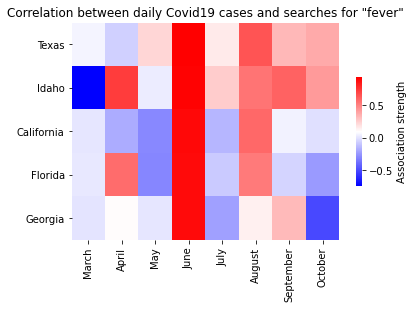

In [25]:
# Look at month of June

top5_june = ctable.sort_values('June', ascending=False).head(5)

sns.heatmap(top5_june, cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 cases and searches for "fever"');

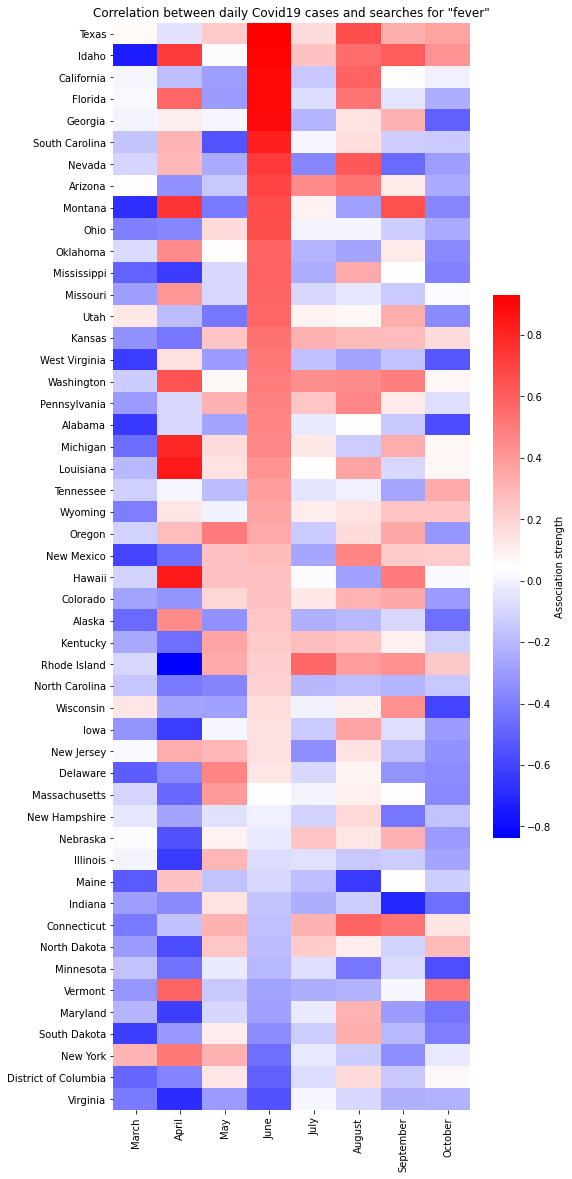

In [26]:
# set the ratio of the plot
plt.figure(figsize=(8,20))
sns.heatmap(ctable.sort_values('June', ascending=False), cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 cases and searches for "fever"');

## Observations: 
* other states not within the top 5 and bottom 5 for cases were searching for 'fever' in June

## 1c. Look at different symptoms: 'anxiety' and 'new_cases'

In [27]:
# 1 use the 'full_merged'

# 2 group by state and month 
grouped_data=full_merged.groupby(['state_x',full_merged.index.month])[['new_cases', 'anxiety']]

# 3 calculate correlation between cases and symptom
ctable = grouped_data.corr()['anxiety'].unstack()['new_cases'].unstack()

# drop Jan and Feb (odd there is data just for a few states in these months)
ctable = ctable.drop(columns=[1,2])

# rename columns with month names intead of numbers
ctable.columns = [calendar.month_name[c] for c in ctable.columns]

# 4 create heatmap
ctable.head()

,March,April,May,June,July,August,September,October
state_x,,,,,,,,
Alabama,0.401391,0.106840,0.169279,0.314993,0.054365,-0.166553,-0.291761,-0.602883
Alaska,0.346755,0.081527,-0.185098,0.005371,0.000018,-0.626947,-0.269881,-0.030010
Arizona,-0.010627,0.030260,-0.331766,0.245332,-0.237730,-0.372836,0.055513,0.069228
California,0.168341,0.462605,-0.322766,0.529055,0.235106,0.063940,0.011144,-0.093561
Colorado,-0.012042,-0.201848,-0.141711,-0.087600,0.207917,-0.110482,0.395965,0.161207


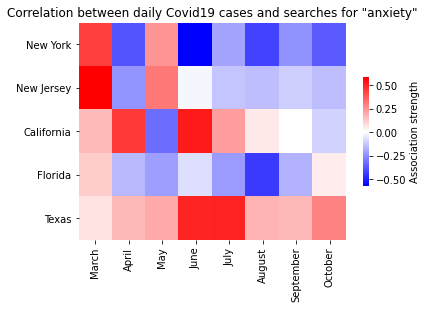

In [28]:
# Plot the top5_states for 'new_cases'

states_to_use = ['Maine','New York', 'New Jersey', 'Florida', 'California','Texas']

top5_cases = ['New York', 'New Jersey', 'California', 'Florida', 'Texas']
bottom5_cases = ['Maine', 'Vermont', 'Hawaii', 'Wyoming', 'Alaska']

#plt.figure(figsize=(8,6))
sns.heatmap(ctable.loc[top5_cases], cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 cases and searches for "anxiety"');

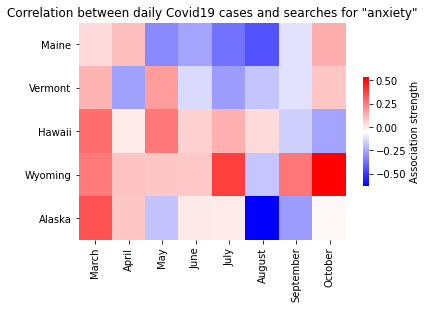

In [29]:
# Plot the bottom5_states for 'new_cases'

states_to_use = ['Maine','New York', 'New Jersey', 'Florida', 'California','Texas']

top5_cases = ['New York', 'New Jersey', 'California', 'Florida', 'Texas']
bottom5_cases = ['Maine', 'Vermont', 'Hawaii', 'Wyoming', 'Alaska']

#plt.figure(figsize=(8,6))
sns.heatmap(ctable.loc[bottom5_cases], cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 cases and searches for "anxiety"');

* does not appear to be a standout month that top or bottom case states were searching for 'anxiety'

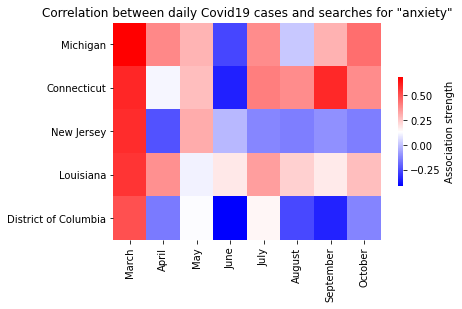

In [30]:
# Look at month of March

top5_march = ctable.sort_values('March', ascending=False).head(5)

sns.heatmap(top5_march, cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 cases and searches for "anxiety"');

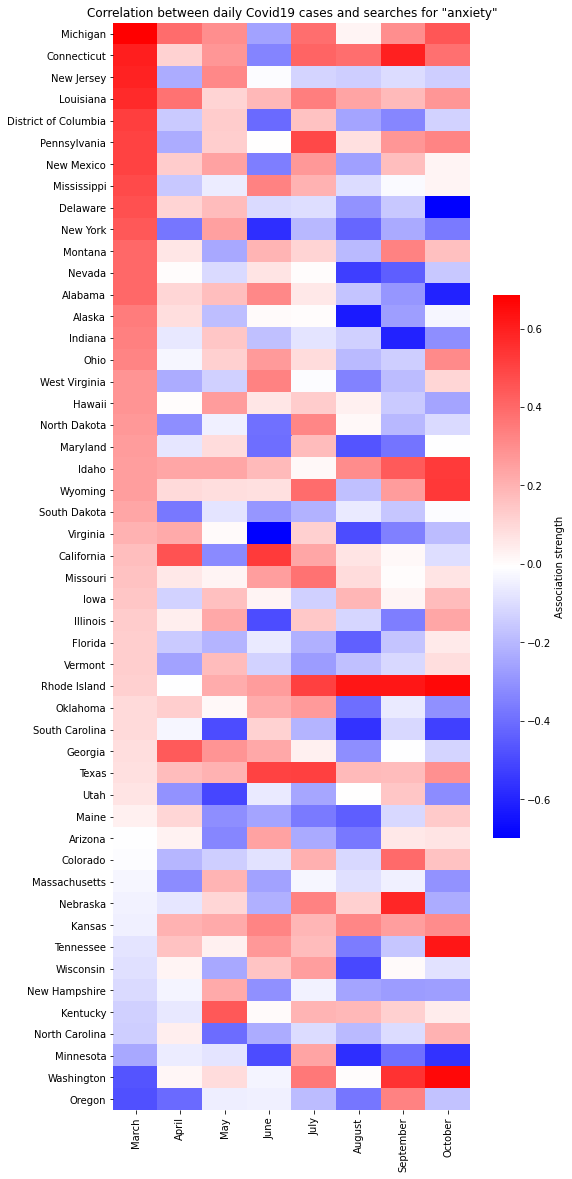

In [31]:
# set the ratio of the plot
plt.figure(figsize=(8,20))
sns.heatmap(ctable.sort_values('March', ascending=False), cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 cases and searches for "anxiety"');

## Observations
* Many states were searching for 'anxiety' at the start of the pandemic-- was this due to the pandemic or was it due to regular circumstances?

## 1d. Look at different symptoms: 'depression' and 'new_cases'

In [32]:
# 1 use the 'full_merged'

# 2 group by state and month 
grouped_data=full_merged.groupby(['state_x',full_merged.index.month])[['new_cases', 'depression']]

# 3 calculate correlation between cases and symptom
ctable = grouped_data.corr()['depression'].unstack()['new_cases'].unstack()

# drop Jan and Feb (odd there is data just for a few states in these months)
ctable = ctable.drop(columns=[1,2])

# rename columns with month names intead of numbers
ctable.columns = [calendar.month_name[c] for c in ctable.columns]

# 4 create heatmap
ctable.head()

,March,April,May,June,July,August,September,October
state_x,,,,,,,,
Alabama,0.409252,0.057418,0.200113,0.470226,-0.281947,-0.223156,-0.268183,-0.654898
Alaska,0.090398,0.138812,-0.162987,0.116190,0.063964,-0.250006,-0.328536,-0.234062
Arizona,-0.349400,0.220158,-0.581561,0.465220,-0.280163,-0.424995,0.027327,0.124299
California,-0.387010,0.300275,-0.513964,0.669628,0.205811,0.009087,-0.126183,-0.243368
Colorado,-0.363271,-0.135158,-0.263088,0.284609,-0.092085,0.123059,0.369326,0.157325


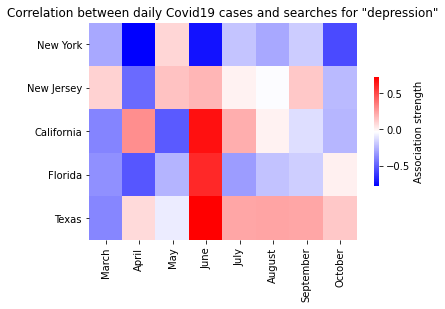

In [33]:
# Plot the top5_states for 'new_cases'

states_to_use = ['Maine','New York', 'New Jersey', 'Florida', 'California','Texas']

top5_cases = ['New York', 'New Jersey', 'California', 'Florida', 'Texas']
bottom5_cases = ['Maine', 'Vermont', 'Hawaii', 'Wyoming', 'Alaska']

#plt.figure(figsize=(8,6))
sns.heatmap(ctable.loc[top5_cases], cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 cases and searches for "depression"');

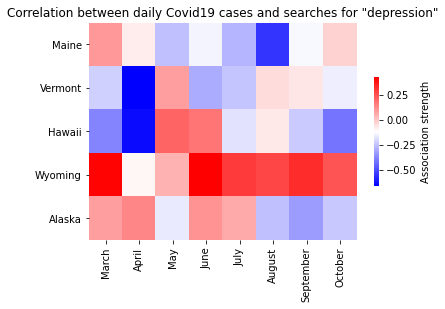

In [34]:
# Plot the bottom5_states for 'new_cases'

states_to_use = ['Maine','New York', 'New Jersey', 'Florida', 'California','Texas']

top5_cases = ['New York', 'New Jersey', 'California', 'Florida', 'Texas']
bottom5_cases = ['Maine', 'Vermont', 'Hawaii', 'Wyoming', 'Alaska']

#plt.figure(figsize=(8,6))
sns.heatmap(ctable.loc[bottom5_cases], cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 cases and searches for "depression"');

* No obvious month for 'depression' in either the top or the bottom case states, but we'll explore one

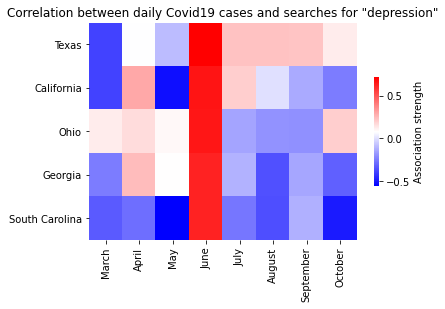

In [35]:
# Look at month of June

top5_june = ctable.sort_values('June', ascending=False).head(5)

sns.heatmap(top5_june, cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 cases and searches for "depression"');

* Month of June was when cases were picking up again in the summer

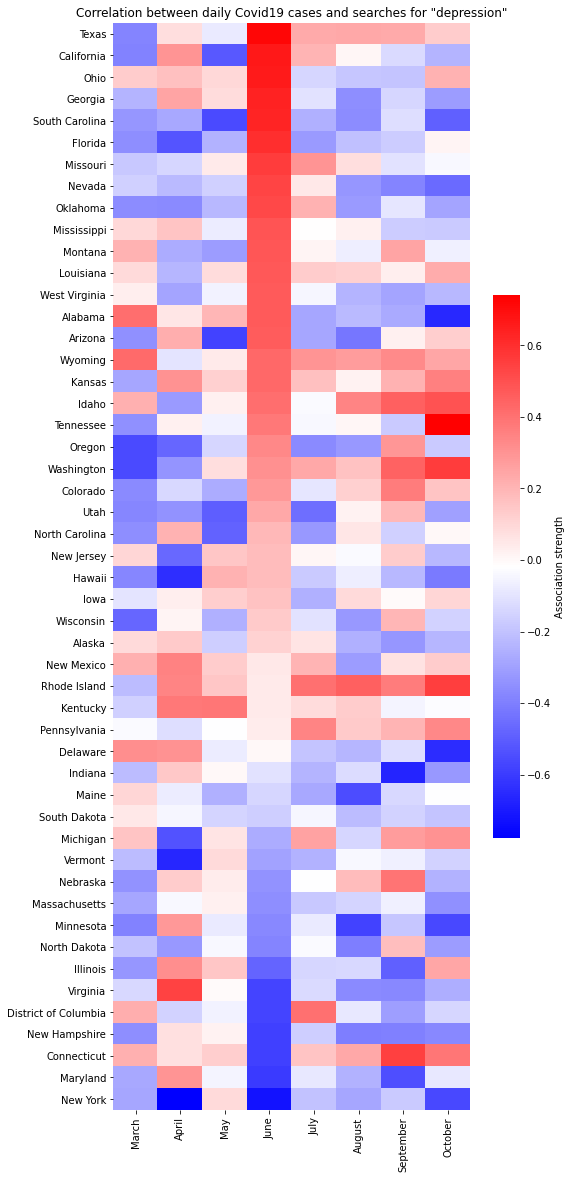

In [36]:
# set the ratio of the plot
plt.figure(figsize=(8,20))
sns.heatmap(ctable.sort_values('June', ascending=False), cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 cases and searches for "depression"');

## Observations:
* High 'depression' serach in April amongst some but not all of the 'top_cases' states

### Overall it seems as though June was the month when people were searching for 'cough' 'fever' and 'depression' the most when focusing on 'new_cases'
* this might be due to outside factors such as the protests for BLM that were going on, but these searches did not necessarily permeate in all of the top 5 states where the case rate were the highest. 
* These search results, rather, were more popular in states that were neither at the top nor the bottom mean case rate 

## 2. 'new_deaths' and symptom correlation exploration

#### 2. new_deaths exploration
* Explore new_deaths for all states
* Explore correlations for symptoms for top5_states and bottom5_states with regards to 'new_cases' by plotting on heat maps
    * 2a. 'cough' 
    * 2b. 'fever' 
    * 2c. 'anxiety' 
    * 2d. 'depression' 
* Observe time periods when top 5 and bottom 5 states had the highest mean search correlation for each symptom mentioned above
* Also look at how all states rank in search for symptoms over time

In [37]:
# Plot all states and their changes in death rates over time

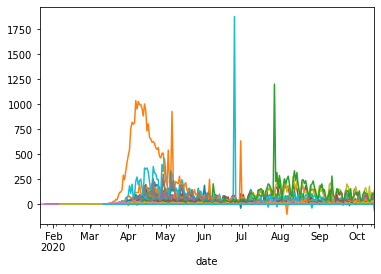

In [38]:
full_merged=full_merged_sorted.set_index(full_merged_sorted['date'])
full_merged.groupby('state_x')['new_deaths'].plot();

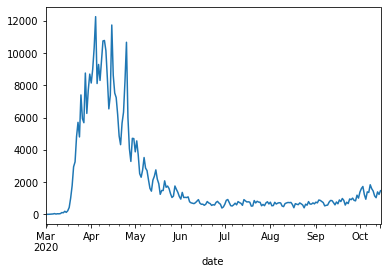

In [39]:
ny_filter = full_merged['state_x'] == 'New York'
full_merged[ny_filter]['new_cases'].plot();

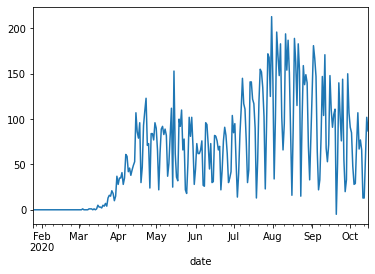

In [40]:
ca_filter = full_merged['state_x'] == 'California'
full_merged[ca_filter]['new_deaths'].plot();

### Observations:
* Appears as though April, May and August have high increasing death rates
* Some spikes in death for an unknown state in late June/July 

### 2a. Look at 'new_deaths' and 'cough'

In [41]:
# 2 group by state and month 
grouped_data=full_merged.groupby(['state_x',full_merged.index.month])[['new_deaths', 'cough']]

# 3 calculate correlation between cases and symptom
ctable = grouped_data.corr()['cough'].unstack()['new_deaths'].unstack()

# drop Jan and Feb (odd there is data just for a few states in these months)
ctable = ctable.drop(columns=[1,2])

# rename columns with month names intead of numbers
ctable.columns = [calendar.month_name[c] for c in ctable.columns]

# 4 create heatmap
ctable.head()

,March,April,May,June,July,August,September,October
state_x,,,,,,,,
Alabama,-0.507311,-0.174284,0.430943,0.055923,0.085700,0.308601,-0.183387,0.007168
Alaska,-0.477947,0.333742,-0.062265,0.181109,-0.180976,-0.086293,0.174493,-0.134193
Arizona,-0.376067,-0.270521,0.329249,0.384444,-0.222252,0.048031,-0.076829,-0.146442
California,-0.486004,-0.603589,0.159621,0.109410,-0.066408,0.230092,0.097492,0.020473
Colorado,-0.600850,-0.237584,0.300928,-0.345398,0.306634,0.068854,0.197815,0.271912


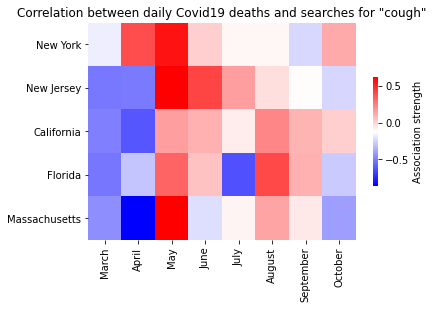

In [42]:
# Plot the top5_states for 'new_deaths'

states_to_use = ['Maine','New York', 'New Jersey', 'Florida', 'California','Texas']

top5_deaths = ['New York', 'New Jersey', 'California', 'Florida', 'Massachusetts']
bottom5_deaths = ['Montana', 'Vermont', 'Hawaii', 'Wyoming', 'Alaska']

#plt.figure(figsize=(8,6))
sns.heatmap(ctable.loc[top5_deaths], cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 deaths and searches for "cough"');



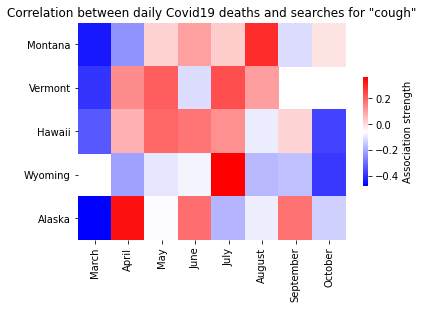

In [43]:
# Plot the bottom5_death states

states_to_use = ['Maine','New York', 'New Jersey', 'Florida', 'California','Texas']

top5_deaths = ['New York', 'New Jersey', 'California', 'Florida', 'Massachusetts']
bottom5_deaths = ['Montana', 'Vermont', 'Hawaii', 'Wyoming', 'Alaska']

#plt.figure(figsize=(8,6))
sns.heatmap(ctable.loc[bottom5_deaths], cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 deaths and searches for "cough"');

* Interesting to see that the states that had the least amount of deaths seem to have searched for more symptoms relating to COVID than the states that had the most cases/deaths

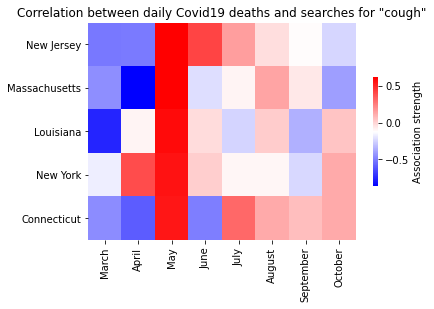

In [44]:
# Look at month of May

top5_may = ctable.sort_values('May', ascending=False).head(5)

sns.heatmap(top5_may, cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 deaths and searches for "cough"');

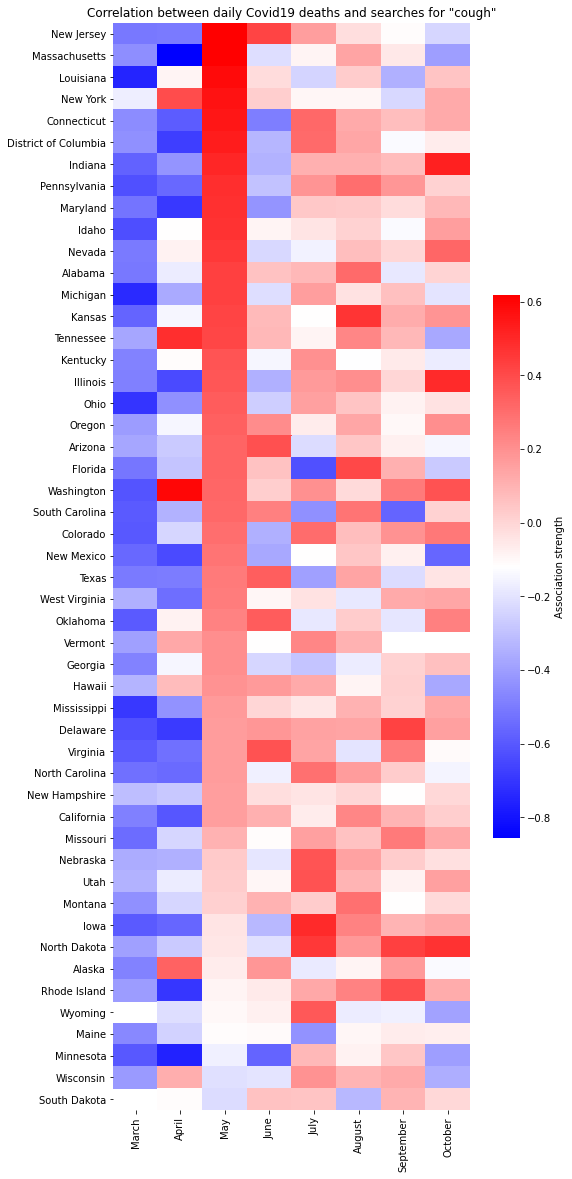

In [45]:
# set the ratio of the plot
plt.figure(figsize=(8,20))
sns.heatmap(ctable.sort_values('May', ascending=False), cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 deaths and searches for "cough"');

### 2b. Look at relationship between new_deaths and "fever"

In [46]:
# 2 group by state and month 
grouped_data=full_merged.groupby(['state_x',full_merged.index.month])[['new_deaths', 'fever']]

# 3 calculate correlation between cases and symptom
ctable = grouped_data.corr()['fever'].unstack()['new_deaths'].unstack()

# drop Jan and Feb (odd there is data just for a few states in these months)
ctable = ctable.drop(columns=[1,2])

# rename columns with month names intead of numbers
ctable.columns = [calendar.month_name[c] for c in ctable.columns]

# 4 create heatmap
ctable.head()

,March,April,May,June,July,August,September,October
state_x,,,,,,,,
Alabama,-0.472108,-0.054374,0.504523,0.164032,0.030294,0.265664,0.065734,0.035262
Alaska,-0.326938,0.242008,0.274444,0.297896,-0.310928,-0.120563,-0.269875,0.075154
Arizona,0.006004,-0.247029,0.383288,0.378423,-0.292445,0.114995,-0.006530,-0.005818
California,-0.004222,-0.498778,0.265304,0.235208,-0.102628,0.377902,0.289872,0.035161
Colorado,-0.262308,-0.203168,0.433285,0.226456,0.164402,0.097957,0.561572,0.106842


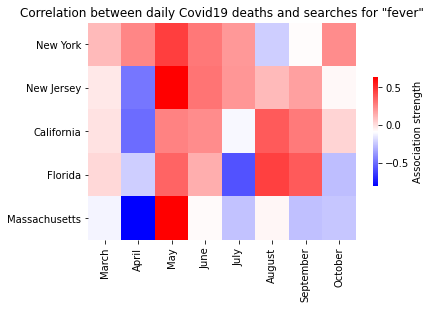

In [47]:
# Plot the top5_states for 'new_deaths'

states_to_use = ['Maine','New York', 'New Jersey', 'Florida', 'California','Texas']

top5_deaths = ['New York', 'New Jersey', 'California', 'Florida', 'Massachusetts']
bottom5_deaths = ['Montana', 'Vermont', 'Hawaii', 'Wyoming', 'Alaska']

#plt.figure(figsize=(8,6))
sns.heatmap(ctable.loc[top5_deaths], cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 deaths and searches for "fever"');

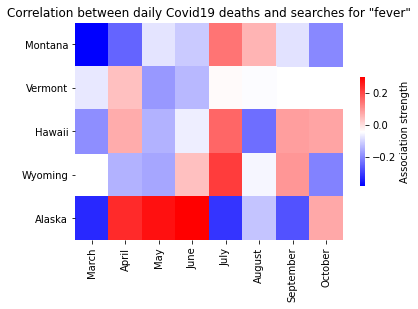

In [48]:
# Plot the bottom5_death states

states_to_use = ['Maine','New York', 'New Jersey', 'Florida', 'California','Texas']

top5_deaths = ['New York', 'New Jersey', 'California', 'Florida', 'Massachusetts']
bottom5_deaths = ['Montana', 'Vermont', 'Hawaii', 'Wyoming', 'Alaska']

#plt.figure(figsize=(8,6))
sns.heatmap(ctable.loc[bottom5_deaths], cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 deaths and searches for "fever"');


* States with less amount of incremental deaths are not as widely searching for COVID syptoms

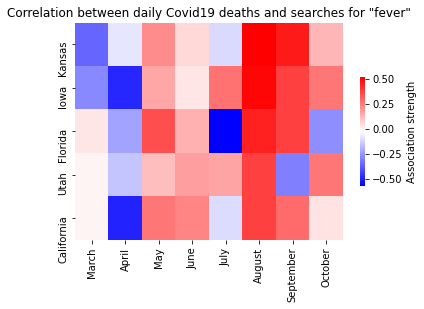

In [49]:
# Look at month of August for top5_deaths

top5_aug = ctable.sort_values('August', ascending=False).head(5)

sns.heatmap(top5_aug, cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 deaths and searches for "fever"');

* August seems like a popular search month for 'fever', relates to inital graph of all states

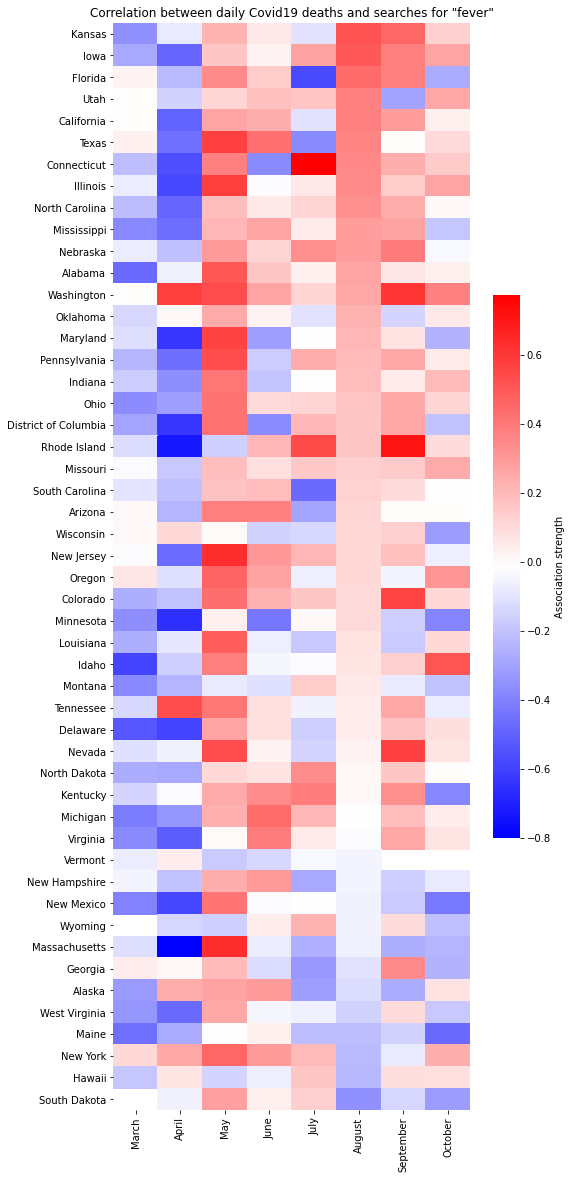

In [50]:
# set the ratio of the plot
plt.figure(figsize=(8,20))
sns.heatmap(ctable.sort_values('August', ascending=False), cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 deaths and searches for "fever"');

* Not as much of a correlation as the inital heat map let on

### 2c. Look at relationship between new_deaths and "anxiety"

In [51]:
# 2 group by state and month 
grouped_data=full_merged.groupby(['state_x',full_merged.index.month])[['new_deaths', 'anxiety']]

# 3 calculate correlation between cases and symptom
ctable = grouped_data.corr()['anxiety'].unstack()['new_deaths'].unstack()

# drop Jan and Feb (odd there is data just for a few states in these months)
ctable = ctable.drop(columns=[1,2])

# rename columns with month names intead of numbers
ctable.columns = [calendar.month_name[c] for c in ctable.columns]

# 4 create heatmap
ctable.head()

,March,April,May,June,July,August,September,October
state_x,,,,,,,,
Alabama,0.369730,0.310077,0.390379,0.175098,0.289335,0.105815,0.122084,0.315914
Alaska,0.017446,-0.166886,0.268363,0.005539,-0.223866,0.063525,-0.183061,0.167172
Arizona,0.012865,0.037100,0.195243,0.185694,0.055506,-0.047047,-0.056742,-0.023656
California,0.153548,0.153621,0.281850,0.256226,0.516665,0.278099,0.394341,0.139827
Colorado,-0.066896,0.135936,0.422586,0.152600,0.236425,0.121644,0.358223,0.343936


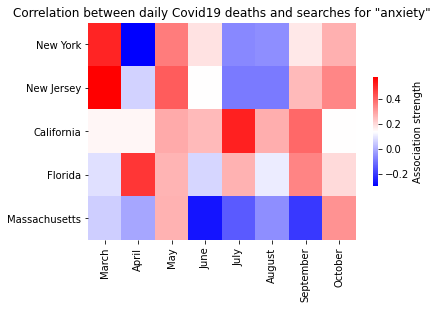

In [52]:
# Plot the top5_states for 'new_deaths'

states_to_use = ['Maine','New York', 'New Jersey', 'Florida', 'California','Texas']

top5_deaths = ['New York', 'New Jersey', 'California', 'Florida', 'Massachusetts']
bottom5_deaths = ['Montana', 'Vermont', 'Hawaii', 'Wyoming', 'Alaska']

#plt.figure(figsize=(8,6))
sns.heatmap(ctable.loc[top5_deaths], cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 deaths and searches for "anxiety"');


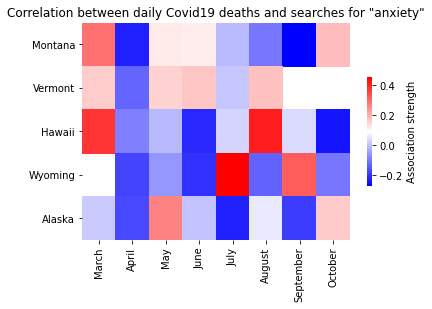

In [53]:
# Plot the bottom5_states for 'new_deaths'

states_to_use = ['Maine','New York', 'New Jersey', 'Florida', 'California','Texas']

top5_deaths = ['New York', 'New Jersey', 'California', 'Florida', 'Massachusetts']
bottom5_deaths = ['Montana', 'Vermont', 'Hawaii', 'Wyoming', 'Alaska']

#plt.figure(figsize=(8,6))
sns.heatmap(ctable.loc[bottom5_deaths], cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 deaths and searches for "anxiety"');


* Virtually no states that had the lowest death counts were searching for 'anxiety' during the year
* Similar results with top death states
* Look at month of August anyway

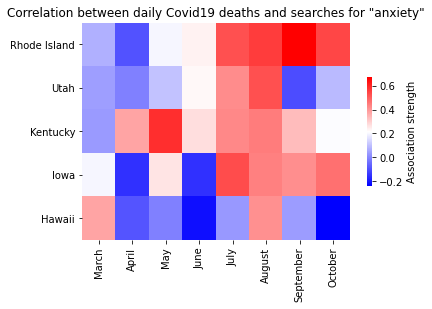

In [54]:
# Look at month of August for top5_deaths

top5_aug = ctable.sort_values('August', ascending=False).head(5)

sns.heatmap(top5_aug, cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 deaths and searches for "anxiety"');

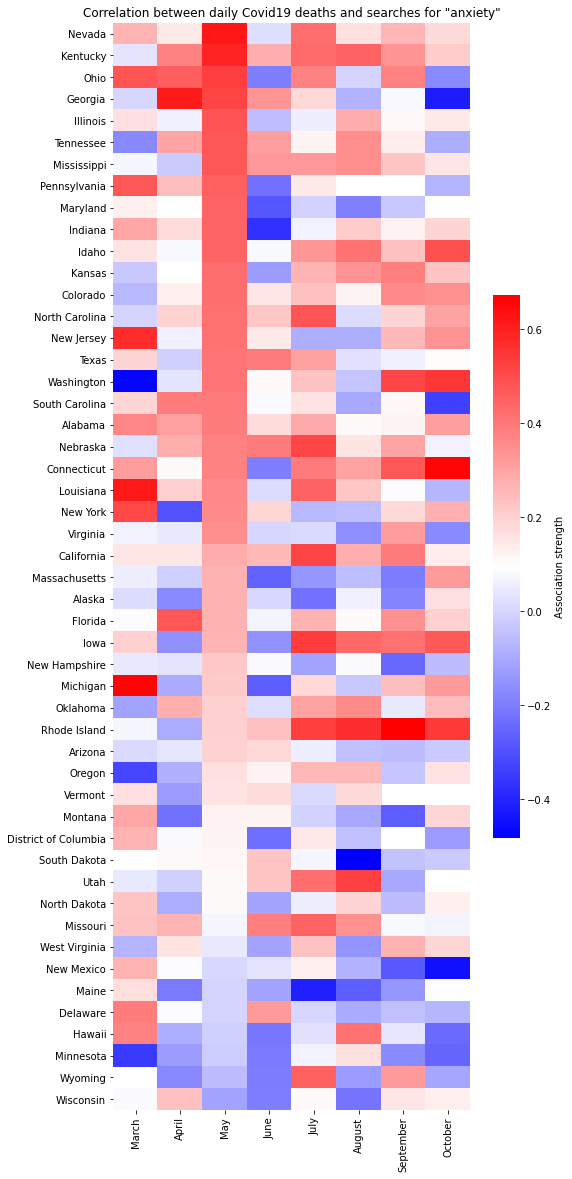

In [55]:
# set the ratio of the plot
plt.figure(figsize=(8,20))
sns.heatmap(ctable.sort_values('May', ascending=False), cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 deaths and searches for "anxiety"');

### 2d. Look at relationship between new_deaths and "depression"

In [56]:
# 2 group by state and month 
grouped_data=full_merged.groupby(['state_x',full_merged.index.month])[['new_deaths', 'depression']]

# 3 calculate correlation between cases and symptom
ctable = grouped_data.corr()['depression'].unstack()['new_deaths'].unstack()

# drop Jan and Feb (odd there is data just for a few states in these months)
ctable = ctable.drop(columns=[1,2])

# rename columns with month names intead of numbers
ctable.columns = [calendar.month_name[c] for c in ctable.columns]

# 4 create heatmap
ctable.head()

,March,April,May,June,July,August,September,October
state_x,,,,,,,,
Alabama,0.586241,0.291689,0.153771,0.137830,0.117332,0.020314,0.075524,0.095754
Alaska,0.366049,0.060845,0.204596,0.144038,-0.290917,0.132085,-0.180975,0.069810
Arizona,-0.248083,0.105566,0.027415,0.294476,-0.012133,-0.040307,-0.122512,-0.257042
California,-0.342565,0.425523,0.091523,0.121350,0.317824,0.187016,0.226171,-0.024749
Colorado,-0.216318,0.107441,0.305373,-0.413541,0.123202,0.006615,0.247527,0.170622


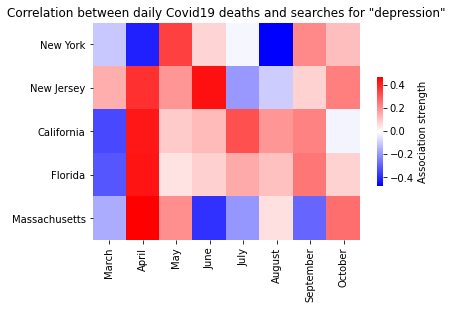

In [57]:
# Plot top5_deaths states for 'new_deaths'

states_to_use = ['Maine','New York', 'New Jersey', 'Florida', 'California','Texas']

top5_deaths = ['New York', 'New Jersey', 'California', 'Florida', 'Massachusetts']
bottom5_deaths = ['Montana', 'Vermont', 'Hawaii', 'Wyoming', 'Alaska']

#plt.figure(figsize=(8,6))
sns.heatmap(ctable.loc[top5_deaths], cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 deaths and searches for "depression"');

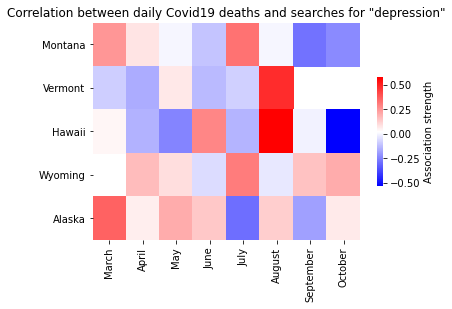

In [58]:
# Plot the bottom5_deaths states for 'new_deaths'

states_to_use = ['Maine','New York', 'New Jersey', 'Florida', 'California','Texas']

top5_deaths = ['New York', 'New Jersey', 'California', 'Florida', 'Massachusetts']
bottom5_deaths = ['Montana', 'Vermont', 'Hawaii', 'Wyoming', 'Alaska']

#plt.figure(figsize=(8,6))
sns.heatmap(ctable.loc[bottom5_deaths], cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 deaths and searches for "depression"');


* Top 5 states with most deaths had a lot of searches in the month of April, the states with the bottom 5 death rate did not share the same intensive searches for depression

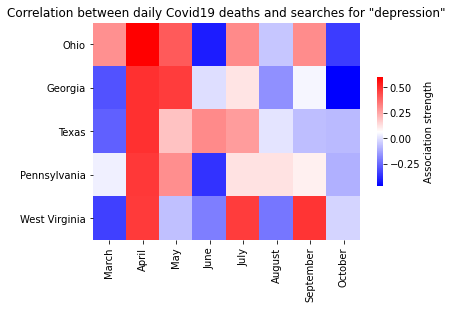

In [59]:
# Look at month of April for top5_deaths

top5_april = ctable.sort_values('April', ascending=False).head(5)

sns.heatmap(top5_april, cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 deaths and searches for "depression"');

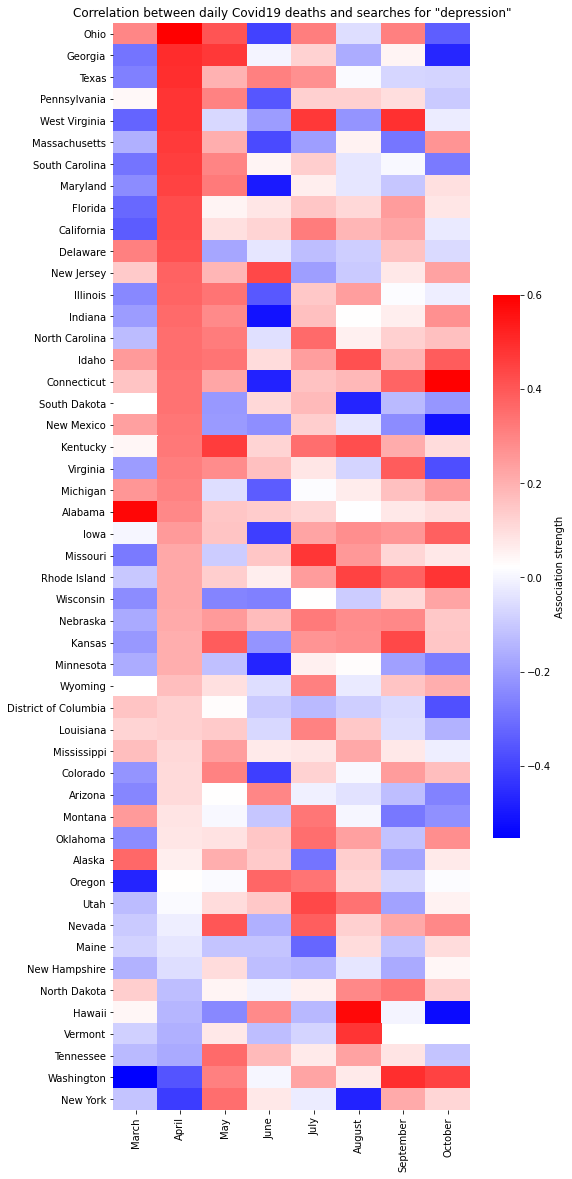

In [60]:
# set the ratio of the plot
plt.figure(figsize=(8,20))
sns.heatmap(ctable.sort_values('April', ascending=False), cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 deaths and searches for "depression"');

### Observations:
* The month of April has many states with a stronger correlation between seraching for 'depression' and increase in deaths due to COVID 